__Figure 13__

Plotting figure 13 requires btc_HE_SB_results.pickle and eth_HE_SB_results.pickle. 

To obtain the two files, one needs to run through the followings with their data:
1. get_calibratedCopulae.ipynb
2. get_OHR.ipynb
3. select_copula
4. concatenate_rh_timeseries.ipynb


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import sys, os
sys.path.append('../../src/')
# import toolbox
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from toolbox import *
import pickle
# from toolbox import *

In [11]:
spotCoin = 'btc'
with open('%s_HE_SB_results.pickle'%spotCoin, 'rb') as f:
    btc_HE = pickle.load(f)

spotCoin = 'eth'
with open('%s_HE_SB_results.pickle'%spotCoin, 'rb') as f:
    eth_HE = pickle.load(f)
    
risk_measures_name = ['Variance', 'ES q=0.05', 'ES q=0.01', 
                      'VaR q=0.05', 'VaR q=0.01', 'ERM k=10']

risk_measure_name_plot = ['Variance', 'ES 95%', 'ES 99%', 'VaR 95%', 'VaR 99%', 'ERM']
rm2name =  dict(zip(risk_measures_name, risk_measure_name_plot))
    

risk_measures_name = ['Variance', 'ES q=0.05', 'ES q=0.01', 
                      'VaR q=0.05', 'VaR q=0.01', 'ERM k=10']

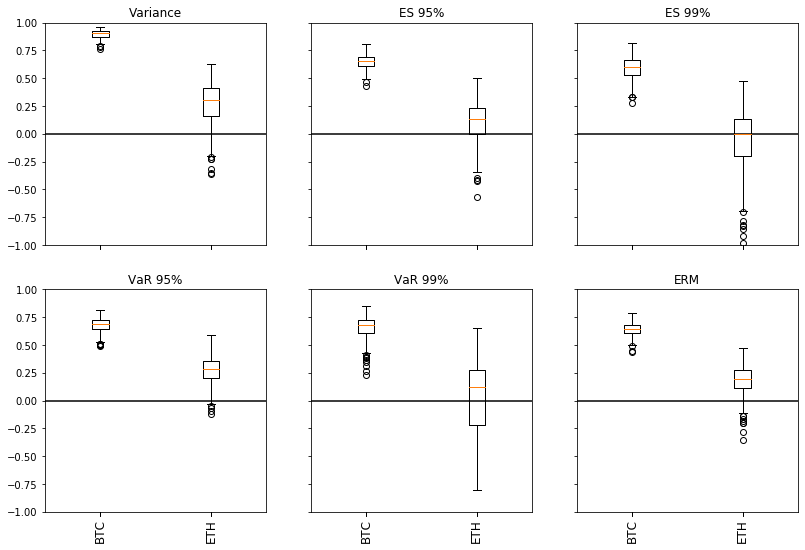

In [12]:
factor = 4.5
xsize = 3*factor
ysize = 2*factor
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(xsize, ysize), sharex=True, sharey=True)

for i, rm in enumerate(risk_measures_name):
    axs.flatten()[i].boxplot([btc_HE[rm], eth_HE[rm]])
    axs.flatten()[i].axhline(y=0, xmin=0, xmax=1, color='black')
    axs.flatten()[i].set_title(rm2name[rm])

for p, a in enumerate(axs):
    xtickNames = plt.setp(axs[p], xticklabels=['BTC', 'ETH'])
    plt.setp(xtickNames, rotation=90, fontsize=12)
    
plt.ylim((-1,1))

plt.savefig('intraday_HE.pdf', transparent=True, bbox_inches = 'tight')